In [2]:
# imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from sklearn.metrics import ndcg_score
import scipy.stats

In [5]:
# Load the data
data = np.load('X-y.npz')
X = data['X']
y = data['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

In [6]:
linearClassifier = LinearRegression()
linearClassifier.fit(X_train, y_train)
    
y_predict = linearClassifier.predict(X_val)
mae = mean_absolute_error(y_val, y_predict)
mse = np.mean((y_val - y_predict)**2)
print("MAE: ", mae)
print("\n")
print("actual: ", [ '%.2f' % elem for elem in y_val ])
print("predic: ", [ '%.2f' % elem for elem in y_predict ])
print("mse: ", mse)

rounded_test = [round(y) for y in y_val]
rounded_predict = [round(y) for y in y_predict]
accuracyscore = accuracy_score(rounded_test, rounded_predict)
print("\n")
print("accuracy score: ", accuracyscore)
print("actual: ", rounded_test)
print("predic: ", rounded_predict)

MAE:  0.8855294724728199


actual:  ['2.00', '1.00', '1.00', '1.00', '2.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '2.00', '0.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '2.00', '1.00', '1.00', '2.00', '1.00', '1.00', '1.00', '2.00', '1.00', '1.00', '1.00', '0.00', '1.00', '1.00', '2.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '2.00', '2.00', '2.00', '1.00', '1.00']
predic:  ['-0.61', '2.89', '1.61', '1.86', '2.17', '0.58', '0.99', '0.99', '2.85', '-1.86', '1.67', '0.48', '0.55', '0.81', '-1.40', '2.56', '-0.61', '3.47', '1.43', '0.88', '0.56', '1.19', '-0.64', '2.70', '0.68', '1.25', '0.61', '1.67', '1.70', '0.86', '0.55', '1.31', '0.73', '1.36', '1.20', '2.84', '-0.86', '1.09', '1.55', '1.45', '0.97', '1.41', '2.65', '1.22', '2.88', '-0.64', '0.60']
mse:  1.3472720336655737


accuracy score:  0.425531914893617
actual:  [2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,

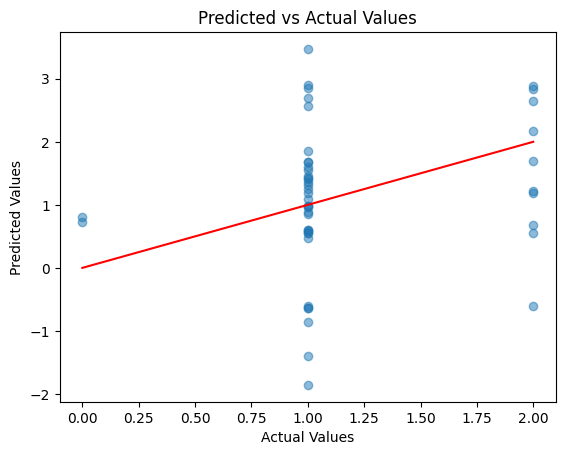

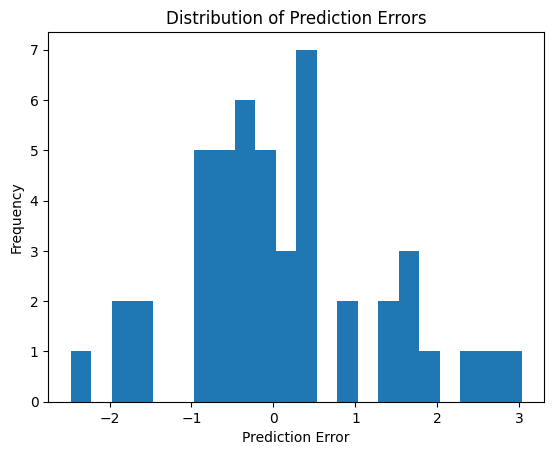

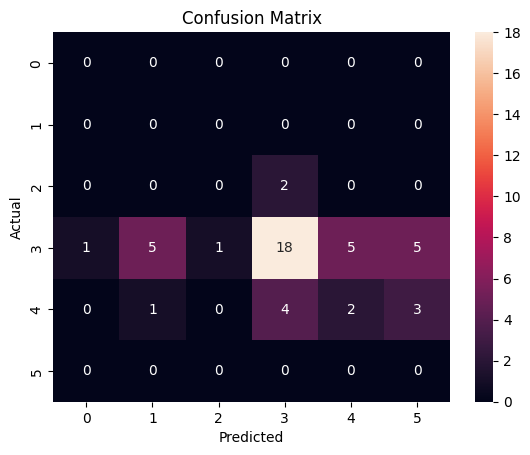

In [8]:
plt.scatter(y_val, y_predict, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Histogram of Prediction Errors
errors = y_val - y_predict
plt.hist(errors, bins=np.arange(min(errors), max(errors) + 0.25, 0.25))
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Confusion Matrix for Rounded Predictions
cm = confusion_matrix(rounded_test, rounded_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
true_scores = np.array(y_val)
true_scores_sorted_indices = np.argsort(true_scores)

# now for linear classification
lc_scores = linearClassifier.predict(X_val)
lc_scores_sorted_indices = np.argsort(lc_scores)
tau_lc, p_value_lc = kendalltau(lc_scores_sorted_indices, true_scores_sorted_indices)
print("\nlinear classifier kendall tau: ", tau_lc, "linear classifier p_value: ", p_value_lc)
correlation, _ = pearsonr(lc_scores, true_scores)
ndcg = ndcg_score(np.array([lc_scores]), np.array([true_scores]))
ndcg_k10 = ndcg_score(np.array([lc_scores]), np.array([true_scores]), k = 10)
rev_ndcg_k10 = ndcg_score((1 / np.array([lc_scores])), (1 / np.array([true_scores])), k=10)
print("linear classifier pearson correlation: ", correlation)
print("ndcg: ", ndcg)
print("ndcg @ k = 10: ", ndcg_k10)
print("reverse ndcg @ k = 10: ", rev_ndcg_k10)